<a href="https://colab.research.google.com/github/snousind/Social-Media-Analysis/blob/Instagram/Social_Media_Insta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Social Media Analysis - Instagram

In [ ]:
# !pip install nltk
# nltk.download('all')

In [ ]:
#importations
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
#reading in dataset and checking columns
insta = pd.read_excel("instagram.xlsx")
insta.columns
# insta.isna()

Index(['title', 'content', 'from', 'location', 'date', 'images', 'url',
       'device', 'hits', 'likes', 'comments'],
      dtype='object')

In [ ]:
insta.duplicated().sum()

0

In [ ]:
#converting all column types to strings
for column in insta:
  insta[column] = insta[column].astype('string')

In [ ]:
#dropping columns and separating date and time columns
new_insta = insta.drop(["title", "location", "hits", "url", "device", "device", "images"], axis = 1)
new_insta[['Date', 'Time']] = new_insta.date.str.split(" ", expand = True)
insta = new_insta.drop(["date", "Time"], axis = 1)
insta.head()

,content,from,likes,comments,Date
0,The FIFA World Cup Qatar 2022™ kicks off today...,vivo_global,430.0,8,2022-11-20
1,� FIFA World Cup Qatar 2022™ is only 3 days aw...,hisense_international,161.0,66,2022-11-17
2,The FIFA World Cup Qatar 2022™ kicks off in 3 ...,vivo_global,662.0,11,2022-11-17
3,The FIFA World Cup Qatar 2022™ is one week awa...,hisensesports,74.0,2,2022-11-12
4,We are 10 days away from the FIFA World Cup Qa...,hisensesports,46.0,3,2022-11-10


In [ ]:
# basic stats
insta[["likes", "comments"]].describe()

,likes,comments
count,7624,7634
unique,1014,276
top,3.0,0
freq,778,4177


In [ ]:
#sorting by date (for timeline)
insta = insta.sort_values(by=["Date"])
#insta.head()
#insta.tail()

In [ ]:
#converting to date-time and floating point
insta['likes'] = insta['likes'].astype(float)
insta['comments'] = insta['comments'].astype(int)
insta['Date'] = pd.to_datetime(insta['Date'], format="%Y/%m/%d")
# insta.dtypes

In [ ]:
sorted_insta_likes = insta.sort_values(by="likes", ascending=False)
sorted_insta_likes.head()

,content,from,likes,comments,Date
7419,World Cup final � cruzbeckham roadto2022en #f...,davidbeckham,2552193.0,6812,2022-12-18
7143,Vamos leomessi ❤️�.Sizce bugün Dünya Kupasını ...,cznburak,1704190.0,6054,2022-12-18
7146,Güzel insan davidbeckham ile beraberiz❤️.Sizce...,cznburak,1599746.0,4415,2022-12-11
7546,Can't wait for this great World Cup semi-final...,m10_official,1589392.0,10354,2022-12-15
7420,Thank you for an unforgettable visit and a Wor...,iamzlatanibrahimovic,1337540.0,2992,2022-12-22


In [ ]:
sorted_insta_comments = insta.sort_values(by="comments", ascending=False)
sorted_insta_comments.head()

,content,from,likes,comments,Date
7426,A pitch invader carrying a rainbow flag brough...,cnn,517036.0,20473,2022-11-29
7546,Can't wait for this great World Cup semi-final...,m10_official,1589392.0,10354,2022-12-15
7421,American journalist Grant Wahl has died in Qat...,cnn,164963.0,7375,2022-12-10
7419,World Cup final � cruzbeckham roadto2022en #f...,davidbeckham,2552193.0,6812,2022-12-18
7143,Vamos leomessi ❤️�.Sizce bugün Dünya Kupasını ...,cznburak,1704190.0,6054,2022-12-18


In [ ]:
##EDA

#to do:
# - most used words by user
# - split up dataset into pre, during and post match to perform EDA as below
# - look into most used words using word cloud
# - correlation matrix of likes and comments

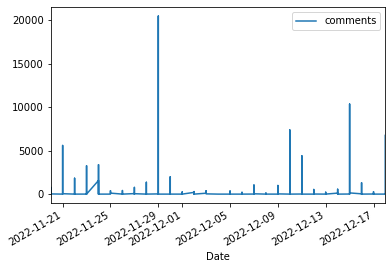

In [ ]:
#trend of comments
insta.plot(x="Date", y="comments")
plt.xlim(["2022-11-20", "2022-12-18"])
plt.show()

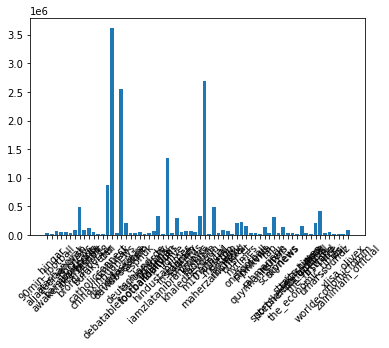

In [ ]:
#users with most number of likes
user_likes = insta.groupby(["from"])["likes"].sum()
filtered_user_likes = user_likes[user_likes >= 20000]
# filtered_user_likes

plt.bar(filtered_user_likes.index, filtered_user_likes.values)
plt.xticks(rotation=45)
plt.show()
#need to increase the fig size + colour

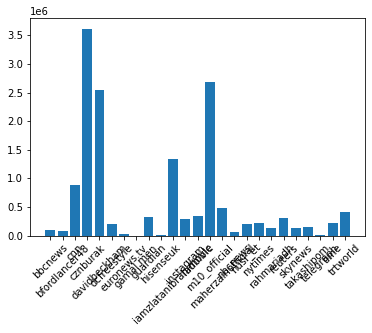

In [ ]:
#users with most number of comments
user_com = insta.groupby("from")["comments"].sum()
filtered_user_com = user_likes[user_com >= 1000]

plt.bar(filtered_user_com.index, filtered_user_com.values)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#stop words

# insta.head()
nltk.download("stopwords")
nltk.download("punkt")
stop_words = set(stopwords.words("english"))

insta['content'] = insta['content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

insta.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snous\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snous\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,from,likes,comments,Date
0,FIFA World Cup Qatar 2022™ kicks today standal...,vivo_global,430.0,8,2022-11-20
1,� FIFA World Cup Qatar 2022™ 3 days away! ⚽️ G...,hisense_international,161.0,66,2022-11-17
2,FIFA World Cup Qatar 2022™ kicks 3 days. Let’s...,vivo_global,662.0,11,2022-11-17
3,FIFA World Cup Qatar 2022™ one week away it’s ...,hisensesports,74.0,2,2022-11-12
4,10 days away FIFA World Cup Qatar 2022™! ⚽️ ⁣ ...,hisensesports,46.0,3,2022-11-10


In [ ]:
#removing emojis
df_emoji = pd.DataFrame(insta)
def remove_emojis(insta):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '',insta)
df_emoji.content=df_emoji['content'].apply(remove_emojis)
df_emoji


,content,from,likes,comments,Date
0,FIFA World Cup Qatar 2022™ kicks today standal...,vivo_global,430.0,8,2022-11-20
1,FIFA World Cup Qatar 2022™ 3 days away! Gues...,hisense_international,161.0,66,2022-11-17
2,FIFA World Cup Qatar 2022™ kicks 3 days. Let’s...,vivo_global,662.0,11,2022-11-17
3,FIFA World Cup Qatar 2022™ one week away it’s ...,hisensesports,74.0,2,2022-11-12
4,10 days away FIFA World Cup Qatar 2022™! ⁣ ⁣ ...,hisensesports,46.0,3,2022-11-10
...,...,...,...,...,...
7629,tensions high Skyworth enjoy every moment FIF...,skyworth_my,5.0,0,2022-12-13
7630,"Morocco’s World Cup magic potion, part, family...",freemalaysiatoday,1413.0,6,2022-12-13
7631,Watch FIFA World Cup Qatar 2022 ™ like never I...,officialhlive,47.0,5,2022-12-05
7632,"Many eyes Iran’s side World Cup, conflating re...",carnegiemiddleeast,5.0,0,2022-11-23


In [ ]:
#Remove specific words
#words_remove = ["", ""]
#stop_words = set(stopwords.words('english'))
#insta['content] = insta['content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words.union(words_to_remove))]))
#insta.head()

In [ ]:
# splitting dataset into pre-match
start_date = '2022-11-01'
end_date = '2022-11-19'
insta_pre = insta[(insta['Date'] >= start_date) & (insta['Date'] <= end_date)]
#insta_pre

,content,from,likes,comments,Date
7400,entered #Hisense amazonfiretv competition year...,hisense_usa,35.0,1,2022-11-01
7024,support successful delivery FIFA World Cup Qat...,gulftimes,53.0,6,2022-11-01
7618,World Cup trophies official football for upcom...,chinaxinhuanews,175.0,2,2022-11-02
7141,"2022 Qatar World Cup2022 coming soon, ready ...",herotai_official,1072.0,20,2022-11-02
7402,Qatar’s moment arrived.⁠ ⁠ tiny emirate using ...,apnews,1289.0,29,2022-11-02
...,...,...,...,...,...
7615,[#] [#World] total cost hosting World Cup yea...,explainerhk,534.0,3,2022-11-19
7468,“Beer football go hand hand.” Football fans Q...,footballdailyuk_,15908.0,433,2022-11-19
1784,Enjoy Football Fever FIFA World Cup around cor...,<NA>,2.0,0,2022-11-19
1788,one places broadcast FIFA WORLD CUP QATAR 2022...,<NA>,18.0,0,2022-11-19


In [ ]:
# splitting dataset into during match - need to further split by rounds once decided
start_date = '2022-11-20'
end_date = '2022-12-18'
insta_during = insta[(insta['Date'] >= start_date) & (insta['Date'] <= end_date)]
#insta_during

In [ ]:
# splitting dataset into post-match
start_date = '2022-12-19'
end_date = '2023-01-30'
insta_post = insta[(insta['Date'] >= start_date) & (insta['Date'] <= end_date)]
#insta_post

,content,from,likes,comments,Date
2725,winner FIFA World Cup here! #messi #qatar2022...,diamondcorner_,6.0,0,2022-12-19
2724,messi argentina win fifa world cup 22 #tofan #...,rishabhtiwari1483,5.0,0,2022-12-19
2723,Vamos Argentina Champions Qatar World cup 2022...,its_diman_01,4.0,0,2022-12-19
2722,World Cup Upper Deck Breakthrough signed Lione...,chefmatt716,5.0,0,2022-12-19
2721,Lionel Messi ends Argentina's 36 years wait wi...,cpscr_official,8.0,0,2022-12-19
...,...,...,...,...,...
7080,United States' Special Advisor International D...,gulftimes,39.0,0,2023-01-26
7084,Qatar’s FIFA World Cup journey showcased secon...,gulftimes,9.0,0,2023-01-26
7082,Department Communication Public Relations Qata...,gulftimes,4.0,0,2023-01-27
7083,Doha Declaration issued high-level event 42nd ...,gulftimes,55.0,2,2023-01-27
